In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r"C:\Users\jakha\Downloads\USL_Mini\USL_Mini\SET_B\online_shoppers_intention.csv")

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [5]:
data.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,10,3
top,May,Returning_Visitor
freq,3364,10551


In [6]:
data.shape

(12330, 18)

In [7]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
data.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

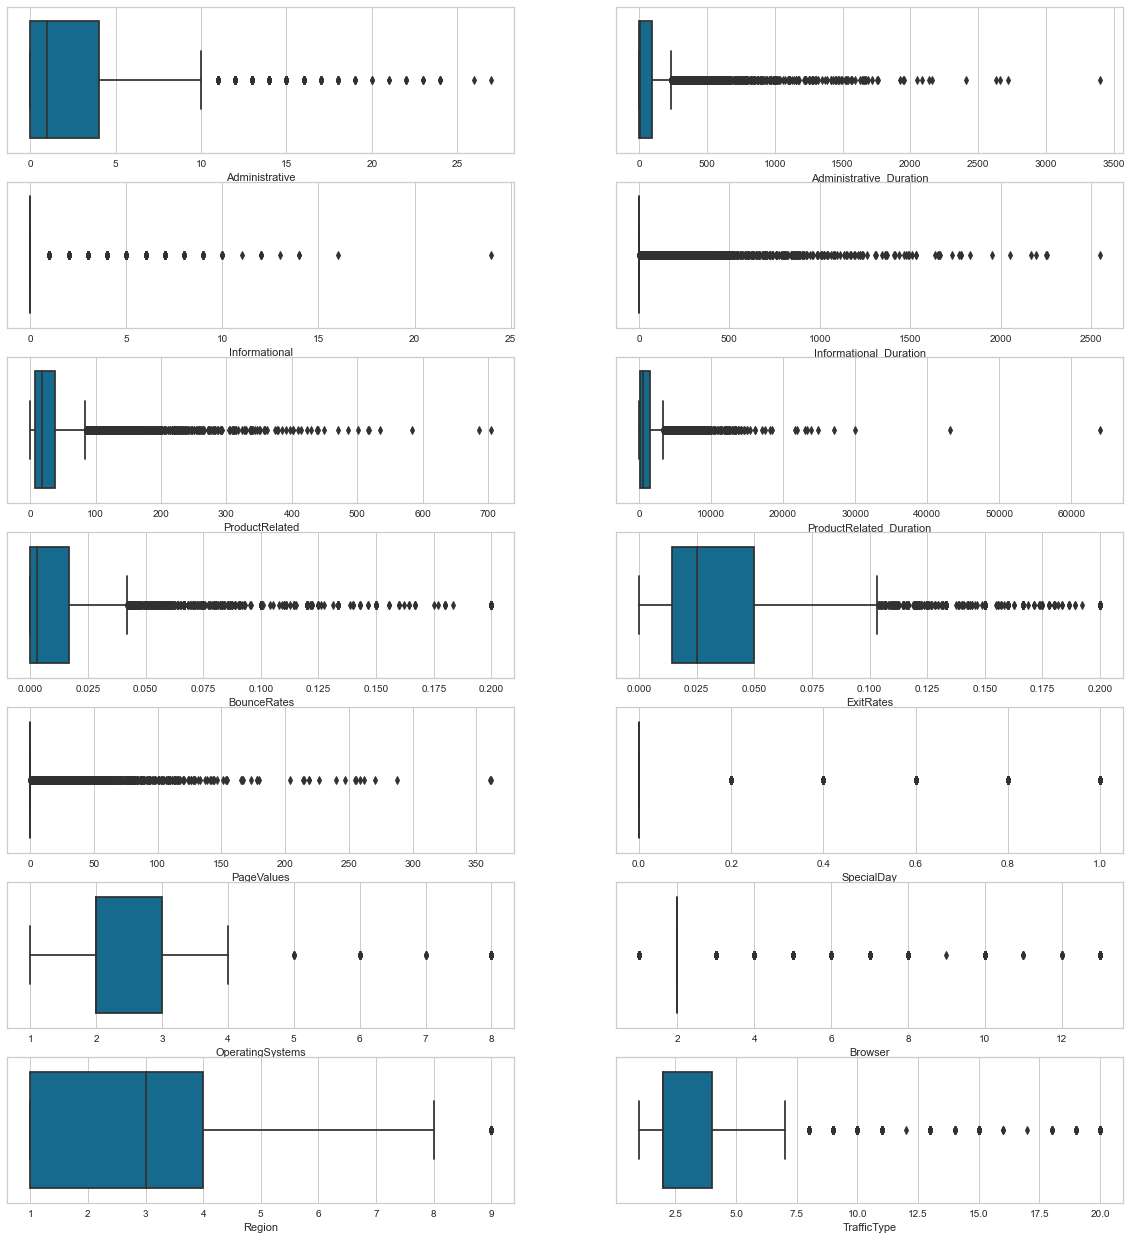

In [9]:
plt.figure(figsize=(20,22))
j=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(7,2,j)
    sns.boxplot(data[i])
    j+=1
plt.show()

In [10]:
data.shape

(12330, 18)

In [11]:
for i in data.select_dtypes(include=np.number).columns:
    Q3 = np.quantile(data[i],0.75)
    Q1 = np.quantile(data[i],0.25)
    IQR = Q3-Q1
    
    UL = Q3+(1.5*IQR)
    LL = Q1-(1.5*IQR)
    data.loc[data[i]>UL,i] = UL
    data.loc[data[i]<LL,i] = LL

In [12]:
data.shape

(12330, 18)

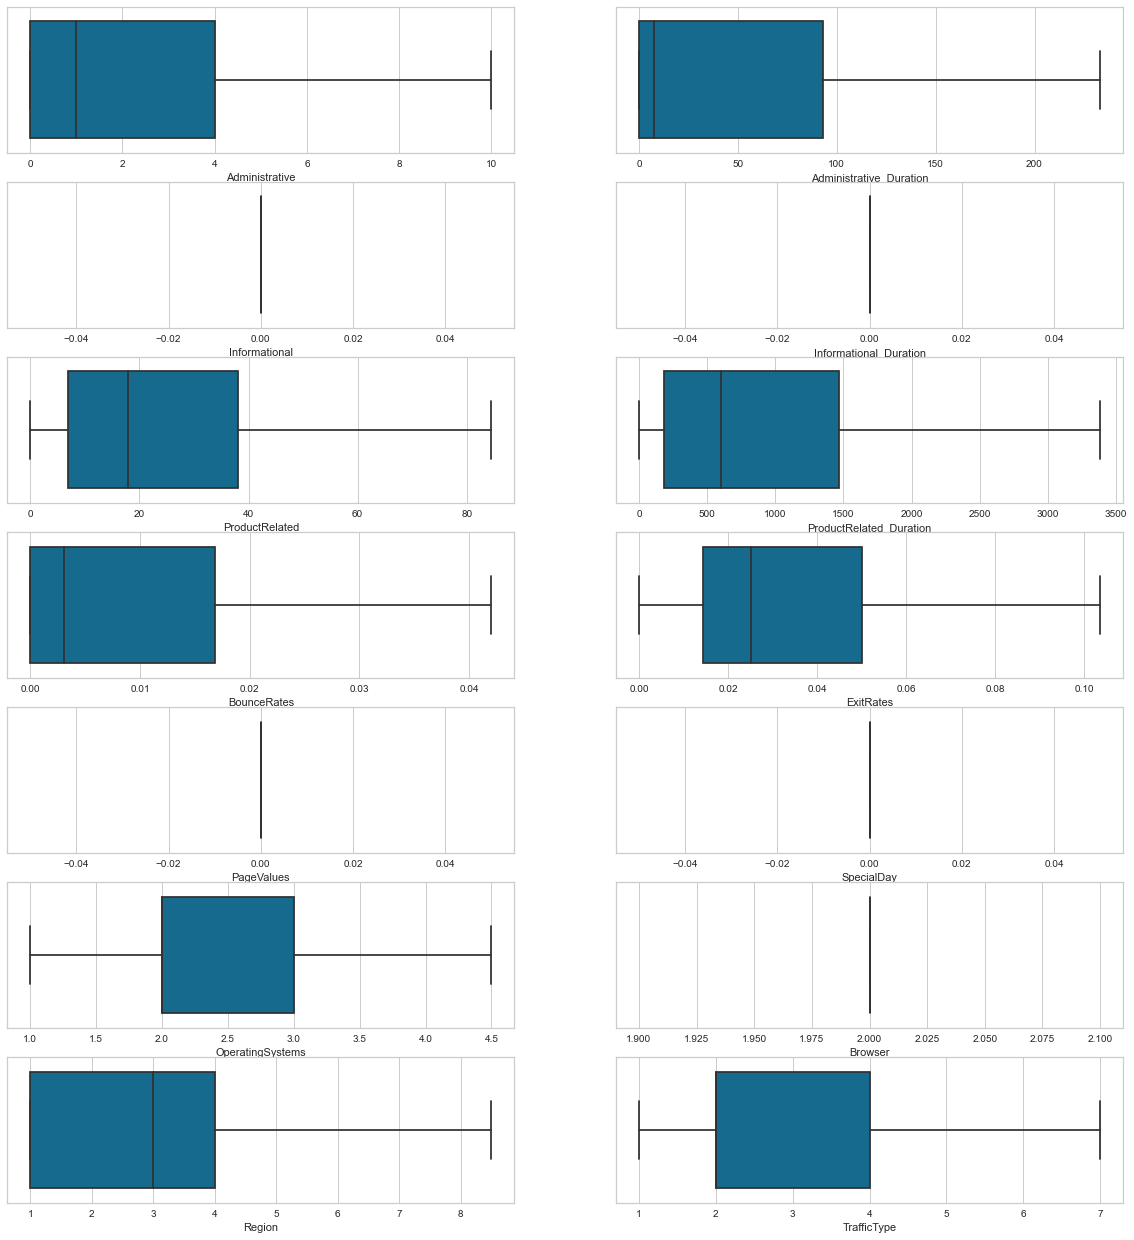

In [13]:
plt.figure(figsize=(20,22))
j=1
for i in data.select_dtypes(include=np.number).columns:
    plt.subplot(7,2,j)
    sns.boxplot(data[i])
    j+=1
plt.show()

## Standard scaling

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,1.0,2,1.0,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1.0,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,4.0,2,8.5,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,Feb,3.0,2,2.0,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,2,1.0,4,Returning_Visitor,True,False


In [16]:
ss = StandardScaler()

In [17]:
data_s = ss.fit_transform(data.select_dtypes(include=np.number))

In [18]:
data_s = pd.DataFrame(data_s,columns=data.select_dtypes(include=np.number).columns)

In [19]:
data_s.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
0,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,-1.395453,0.0,-0.903969,-1.064099
1,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,-0.124094,0.0,-0.903969,-0.584028
2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,2.418624,0.0,2.284045,-0.103957
3,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,1.147265,0.0,-0.478900,0.376114
4,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,1.147265,0.0,-0.903969,0.376114


# Encoding

In [20]:
cat=pd.get_dummies(data.select_dtypes(include='object'),drop_first=True)

# Merging cat and Num Data

In [21]:
data_s=pd.concat([data_s,cat],axis=1)

In [22]:
data_s.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
1,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
3,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1
4,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,...,1,0,0,0,0,0,0,0,0,1


# Clustering

## K-Means Clustering

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
n_clus = [2,3,4,5,6,7,8,9,10]
wcss = []
sil_scr = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    pred = model.fit_predict(data_s)
    sil_scr.append(silhouette_score(data_s,pred))
    wcss.append(model.inertia_)

In [25]:
pd.DataFrame({'WCSS':wcss,'Silhoute Score':sil_scr},index=n_clus)

,WCSS,Silhoute Score
2,96194.653341,0.207879
3,81046.163446,0.200220
4,73848.368611,0.189619
5,68461.530058,0.177336
6,64186.633153,0.176654
7,60394.622759,0.173104
8,57557.754008,0.170289
9,55390.482579,0.163723
10,53892.171463,0.153516


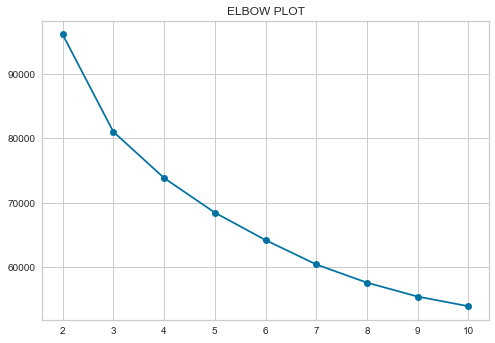

In [26]:
plt.plot(n_clus,wcss,marker='o')
plt.title('ELBOW PLOT')
plt.show()

In [27]:
model = KMeans()
kelbow_viz = KElbowVisualizer(model,k=10)

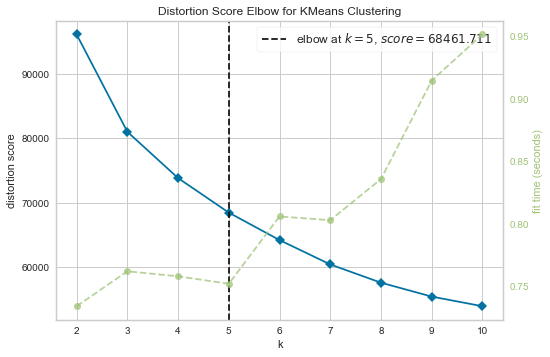

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [28]:
kelbow_viz.fit(data_s)
kelbow_viz.show()

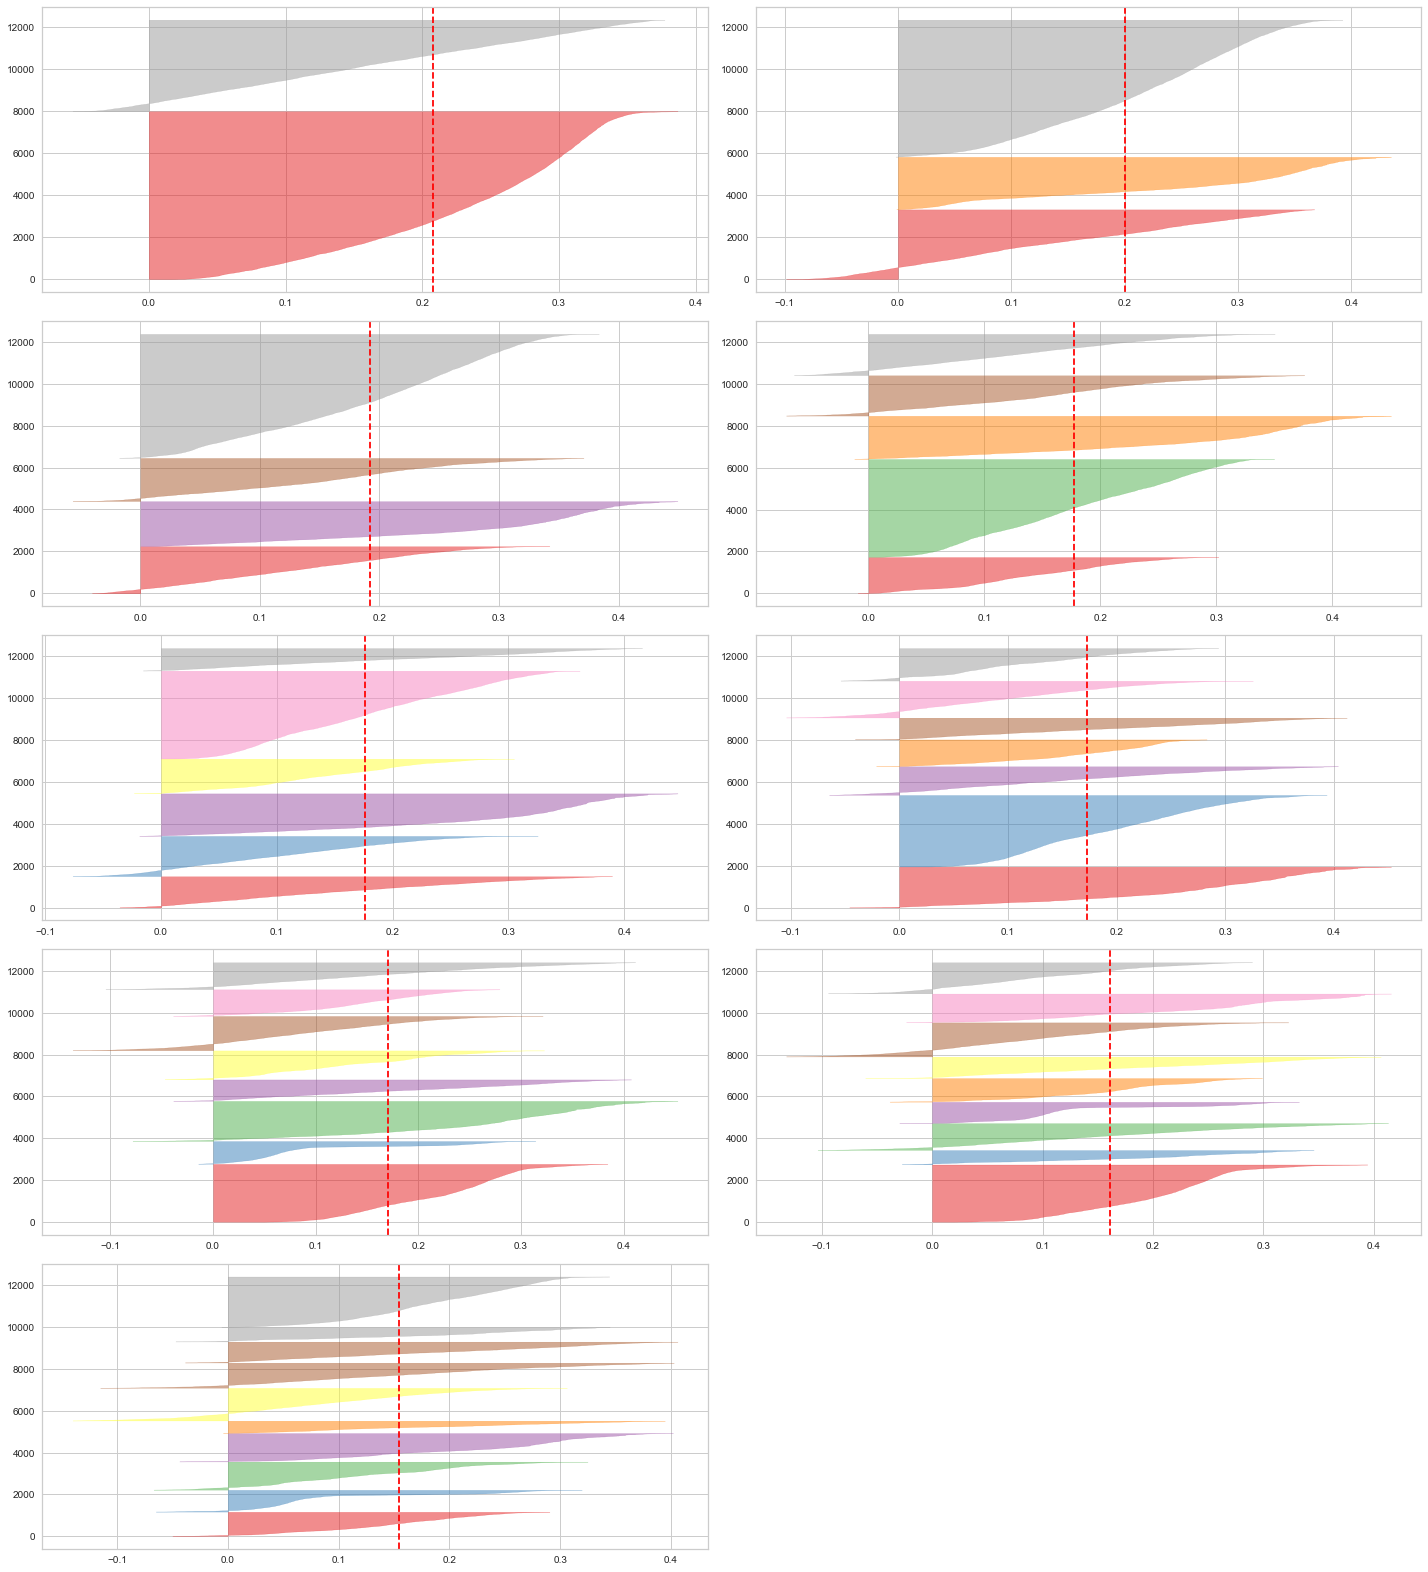

In [29]:
plt.figure(figsize=(20,22))
p=1
for i in n_clus:
    plt.subplot(5,2,p)
    model = KMeans(n_clusters=i, random_state=3)
    sil_viz = SilhouetteVisualizer(estimator=model)
    sil_viz.fit(data_s)
    p+=1
plt.tight_layout()
plt.show()

In [30]:
model_f = KMeans(n_clusters=5,random_state=3)

In [31]:
data['Pred_KM'] = model_f.fit_predict(data_s)

In [32]:
data['Pred_KM'].value_counts()

1    4668
2    2051
4    1967
3    1919
0    1725
Name: Pred_KM, dtype: int64

In [33]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Pred_KM
0,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,1.0,2,1.0,1,Returning_Visitor,False,False,2
1,0,0.0,0,0.0,2.0,64.000000,0.000000,0.100000,0.0,0.0,Feb,2.0,2,1.0,2,Returning_Visitor,False,False,1
2,0,0.0,0,0.0,1.0,0.000000,0.042031,0.103571,0.0,0.0,Feb,4.0,2,8.5,3,Returning_Visitor,False,False,2
3,0,0.0,0,0.0,2.0,2.666667,0.042031,0.103571,0.0,0.0,Feb,3.0,2,2.0,4,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10.0,627.500000,0.020000,0.050000,0.0,0.0,Feb,3.0,2,1.0,4,Returning_Visitor,True,False,1


In [34]:
clust = model_f.cluster_centers_

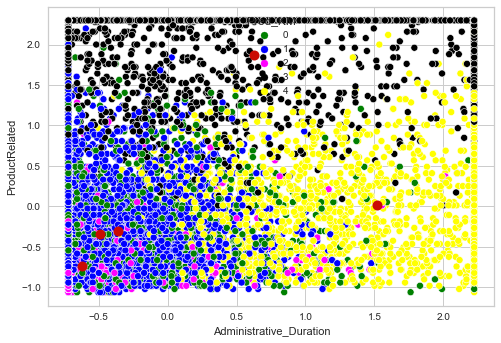

In [35]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=data['Pred_KM'],data=data_s,palette=['green','blue','magenta','black','yellow'])
plt.plot(clust[0][1],clust[0][4],marker='o',color='r',ms=10)
plt.plot(clust[1][1],clust[1][4],marker='o',color='r',ms=10)
plt.plot(clust[2][1],clust[2][4],marker='o',color='r',ms=10)
plt.plot(clust[3][1],clust[3][4],marker='o',color='r',ms=10)
plt.plot(clust[4][1],clust[4][4],marker='o',color='r',ms=10)

In [36]:
data_s['Pred_KM'] = data['Pred_KM']

In [37]:
data_s.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_Other,VisitorType_Returning_Visitor,Pred_KM
0,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2
1,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.896052,-0.734733,2.082720,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1
2,-0.751846,-0.718922,0.0,0.0,-1.021518,-0.958002,2.090999,2.199769,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2
3,-0.751846,-0.718922,0.0,0.0,-0.981764,-0.955421,2.090999,2.199769,0.0,0.0,...,0,0,0,0,0,0,0,0,1,2
4,-0.751846,-0.718922,0.0,0.0,-0.663735,-0.350594,0.609848,0.444034,0.0,0.0,...,0,0,0,0,0,0,0,0,1,1


# One By One Cluster Analyse

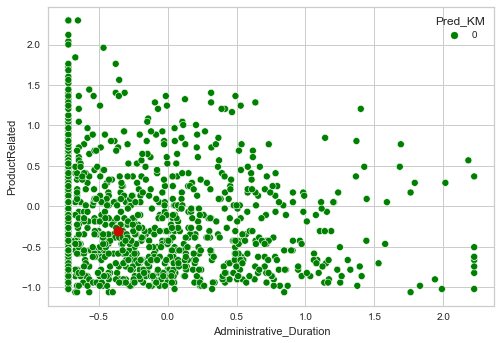

In [38]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=data_s[data_s['Pred_KM']==0],palette=['green'])
plt.plot(clust[0][1],clust[0][4],marker='o',color='r',ms=10)

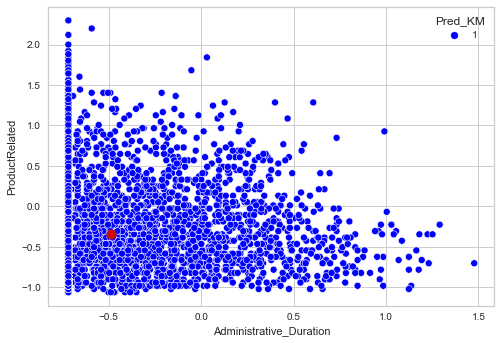

In [39]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=data_s[data_s['Pred_KM']==1],palette=['blue'])
plt.plot(clust[1][1],clust[1][4],marker='o',color='r',ms=10)

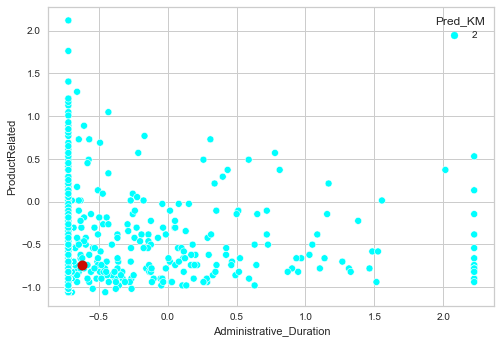

In [40]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=data_s[data_s['Pred_KM']==2],palette=['cyan'])
plt.plot(clust[2][1],clust[2][4],marker='o',color='r',ms=10)

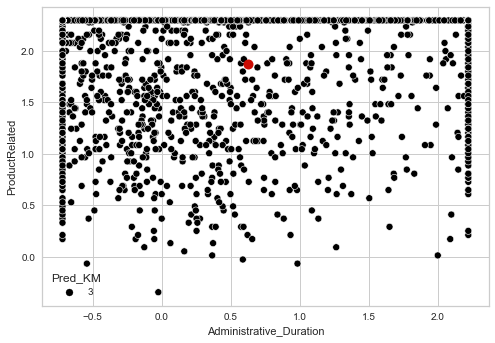

In [41]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=data_s[data_s['Pred_KM']==3],palette=['black'])
plt.plot(clust[3][1],clust[3][4],marker='o',color='r',ms=10)

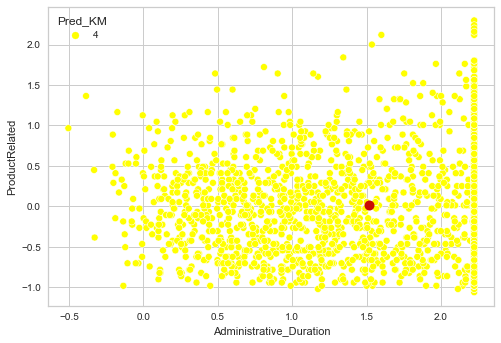

In [42]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue='Pred_KM',data=data_s[data_s['Pred_KM']==4],palette=['yellow'])
plt.plot(clust[4][1],clust[4][4],marker='o',color='r',ms=10)

## Aggloromative Clustering

In [43]:
del data_s['Pred_KM']

In [44]:
from sklearn.cluster import AgglomerativeClustering

In [45]:
from scipy.cluster.hierarchy import dendrogram,linkage

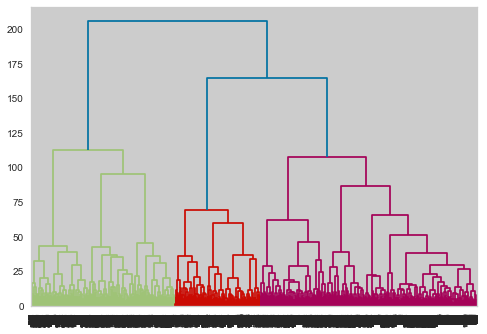

In [46]:
dist_points = linkage(data_s,method='ward')

dend = dendrogram(dist_points)
plt.show()

In [47]:
n_clus

[2, 3, 4, 5, 6, 7, 8, 9, 10]

In [48]:
sil_sc = []
for i in n_clus:
    model = AgglomerativeClustering(n_clusters=i)
    pred = model.fit_predict(data_s)
    sil_sc.append(silhouette_score(data_s,pred))

In [49]:
pd.DataFrame({'Silhoutte Score':sil_sc},index=n_clus)

,Silhoutte Score
2,0.171011
3,0.151863
4,0.132614
5,0.131315
6,0.134044
7,0.127653
8,0.117276
9,0.106136
10,0.110021


In [64]:
model_f = AgglomerativeClustering(n_clusters=3)
data['Pred_Agglo'] = model_f.fit_predict(data_s)

In [65]:
data['Pred_Agglo'].value_counts()

1    5985
0    3988
2    2357
Name: Pred_Agglo, dtype: int64

<AxesSubplot:xlabel='Administrative_Duration', ylabel='ProductRelated'>

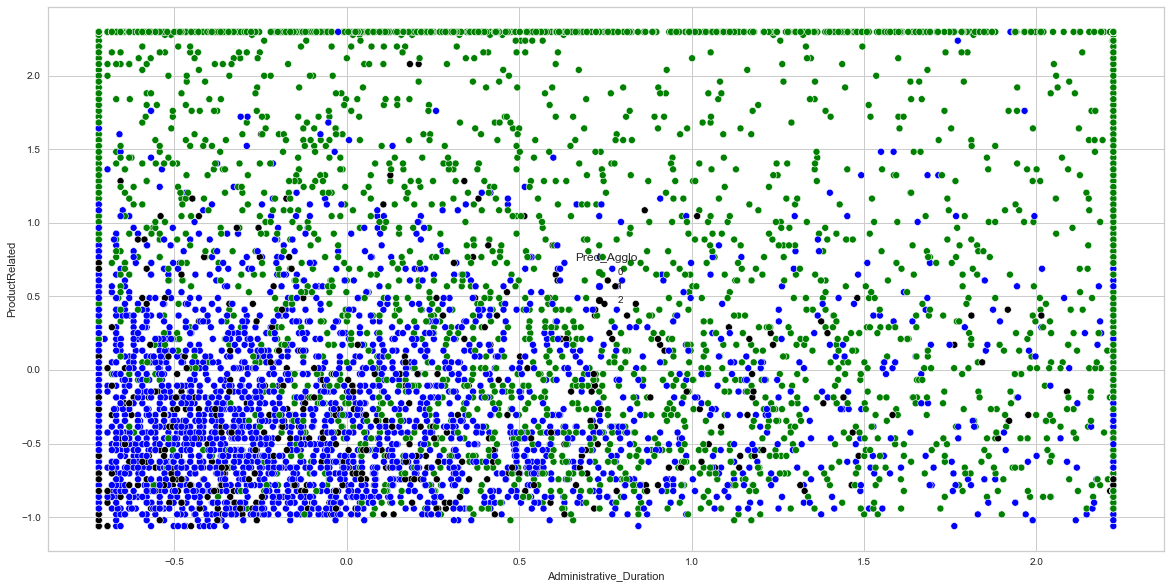

In [93]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=data['Pred_Agglo'],data=data_s,palette=['green','blue','black'])


## DBSCAN

In [53]:
from sklearn.cluster import DBSCAN 

# K- Distance plot

In [55]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=2)

nn_model = nn.fit(data_s)

In [56]:
distance, index = nn_model.kneighbors(data_s)

In [57]:
distance = np.sort(distance,axis=0)

Text(0.5, 0, 'Sorted Distance')

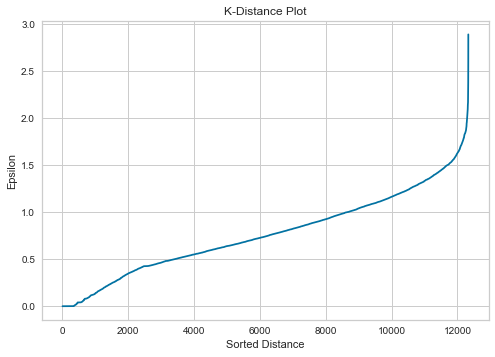

In [107]:
plt.plot(distance[:,1])

plt.title('K-Distance Plot')
plt.ylabel('Epsilon')
plt.xlabel('Sorted Distance')

In [71]:
# epsilon = 1.5, min_samples = 10 to 25
epsilon =2
sil_score = []
for i in range(10,25):
    model = DBSCAN(eps=epsilon,min_samples=i)
    pred = model.fit_predict(data_s)
    sil_score.append(silhouette_score(data_s,pred))
    
pd.DataFrame({'Sillhoute Score':sil_score},index=range(10,25))

,Sillhoute Score
10,0.211478
11,0.208219
12,0.204540
13,0.203191
14,0.201894
15,0.202319
16,0.197700
17,0.194918
18,0.175997
19,0.174254


In [88]:
model_f = DBSCAN(eps=1.5,min_samples=11)
data['Pred_DBS'] = model_f.fit_predict(data_s)

In [89]:
data['Pred_DBS'].value_counts()

 0    10382
-1     1907
 1       33
 2        8
Name: Pred_DBS, dtype: int64

<AxesSubplot:xlabel='Administrative_Duration', ylabel='ProductRelated'>

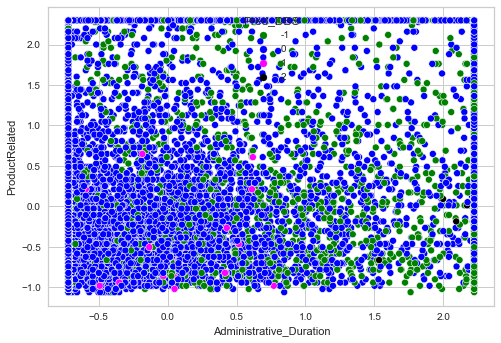

In [91]:
sns.scatterplot(x='Administrative_Duration',y='ProductRelated',hue=data['Pred_DBS'],data=data_s,palette=['green','blue','magenta','black'])

## PCA

In [94]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(n_components=21)

In [97]:
data_pca = pca.fit_transform(data_s)

In [99]:
data_pca = pd.DataFrame(data_pca,columns=range(1,22))

In [100]:
data_pca

,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,-2.994310,1.151259,-2.039189,-1.330268,-0.026433,-0.020501,0.149135,0.001131,-0.013398,0.086688,...,0.010309,0.035356,0.303547,-0.080950,-0.008892,0.153118,0.965330,0.019838,-0.094453,-3.311654e-16
1,-2.032554,-0.368356,-0.740423,-0.346201,-0.566962,0.634977,0.271061,1.759765,-0.103746,-0.098360,...,0.268176,0.052921,0.378149,-0.085533,0.012173,0.153176,0.956930,-0.009843,-0.091934,-1.965611e-16
2,-3.074504,1.927847,1.703366,0.671759,2.283820,1.258784,0.213532,0.075497,-0.064230,0.077667,...,0.059941,0.000723,0.312676,-0.065854,-0.010908,0.156046,0.989221,-0.059429,-0.097293,1.829304e-14
3,-3.064028,1.939997,0.225025,0.192780,-0.316437,0.718385,0.208000,0.061089,-0.012930,0.150168,...,0.063188,0.015180,0.319718,-0.077602,-0.007400,0.152226,0.978099,-0.022903,-0.095126,3.883903e-15
4,-1.460828,0.386764,0.229827,0.850804,-0.900231,0.733548,0.091571,-0.137763,0.136000,0.140790,...,-0.148776,-0.181858,0.355455,-0.091427,0.007258,0.175644,0.978911,-0.009951,-0.093893,-1.868219e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.577124,0.893331,0.060946,1.070627,-0.292932,2.444826,0.032276,0.142372,0.590175,0.279244,...,0.464865,-0.219842,-0.191752,0.025221,0.000682,-0.018148,-0.000587,-0.038974,-0.012236,-6.594413e-18
12326,-0.826590,-0.751966,1.456714,1.240767,-1.784713,-0.097283,0.706338,-0.032721,-0.020832,-0.448634,...,-0.200916,-0.387161,-0.003256,0.000425,0.003474,-0.001749,-0.021777,-0.014120,0.001945,4.214342e-18
12327,-2.719011,2.066847,0.869929,0.700060,-1.323215,-0.178429,0.788441,-0.370625,-0.106447,-0.327769,...,-0.041970,-0.096220,-0.064537,0.020213,-0.022238,-0.032160,-0.016163,-0.022105,-0.000693,-5.551818e-18
12328,0.273114,-0.451760,1.551783,-0.353282,-1.095916,-0.934005,0.687697,0.021754,-0.473963,-0.357891,...,-0.028033,-0.357742,-0.074810,-0.000745,0.003794,-0.004647,-0.011377,-0.005357,-0.003185,5.252642e-18


In [101]:
var = pca.explained_variance_ratio_

In [102]:
var

array([3.22029834e-01, 1.27369000e-01, 1.12300715e-01, 1.08323963e-01,
       9.91673420e-02, 8.86394567e-02, 2.55437121e-02, 2.19502387e-02,
       1.91956555e-02, 1.81378017e-02, 1.50626789e-02, 1.31655096e-02,
       1.00067808e-02, 6.30136310e-03, 4.09813952e-03, 3.56758533e-03,
       2.54503713e-03, 1.62115963e-03, 6.17112489e-04, 3.56915089e-04,
       3.22352458e-33])

In [104]:
add = 0
for i in range(21):
    add = add+var[i]
    print('Total Variance upto PC%s is %.2f'%(i+1,add))

Total Variance upto PC1 is 0.32
Total Variance upto PC2 is 0.45
Total Variance upto PC3 is 0.56
Total Variance upto PC4 is 0.67
Total Variance upto PC5 is 0.77
Total Variance upto PC6 is 0.86
Total Variance upto PC7 is 0.88
Total Variance upto PC8 is 0.91
Total Variance upto PC9 is 0.92
Total Variance upto PC10 is 0.94
Total Variance upto PC11 is 0.96
Total Variance upto PC12 is 0.97
Total Variance upto PC13 is 0.98
Total Variance upto PC14 is 0.99
Total Variance upto PC15 is 0.99
Total Variance upto PC16 is 0.99
Total Variance upto PC17 is 1.00
Total Variance upto PC18 is 1.00
Total Variance upto PC19 is 1.00
Total Variance upto PC20 is 1.00
Total Variance upto PC21 is 1.00


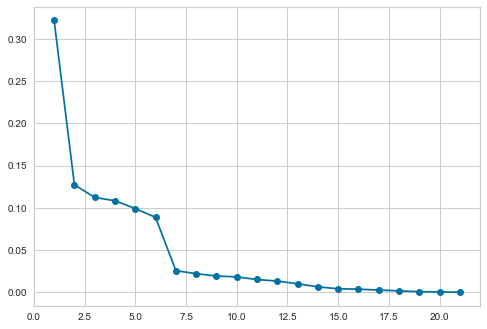

In [106]:
plt.plot(np.arange(1,22),var,marker='o')